In [8]:
from bsread import source
import json
from SAROP11_ATT01_proc import *
from SAROP11_ATT01_proc import _interpolate_row

import matplotlib.pyplot as plt
%matplotlib notebook

## Load setting and user set up

In [9]:
with open('SAROP11-ATT01_proc.json') as f:
    parmas = json.load(f)

In [10]:
initialize_jp(parmas, globals())
dumy = "dumy"
data = {}

In [14]:
numshots = 20
data_out = []
with source(channels=parmas['bsread_channels']) as stream:
    for i in range(0, numshots):
        message = stream.receive()
        data[parmas['bsread_channels'][0]] = message.data.data[parmas['bsread_channels'][0]].value
        data[parmas['bsread_channels'][1]] = message.data.data[parmas['bsread_channels'][1]].value
        data[parmas['bsread_channels'][2]] = message.data.data[parmas['bsread_channels'][2]].value
        data_out.append(process_jp(data,dumy,dumy,parmas, globals()))

In [15]:
edge_pos = []
signal = []
background = []
for i in range(0, len(data_out)):
    try:
        edge_pos.append(data_out[i]['SAROP11-ATT01:edge_pos'][0])
        signal.append(data_out[i]['SAROP11-ATT01:signal'][0])
        background.append(np.mean(data_out[i]['SAROP11-ATT01:buffer'], axis =0)[0])  
    except:
        print('nan')
#     except:
#         edge_pos.append(data_out[i]['SAROP11-ATT01:edge_pos'])
#         signal.append(data_out[i]['SAROP11-ATT01:signal'])
signal = np.array(signal)
background = np.array(background)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [6]:
data_out[2]['SAROP11-ATT01:signal']

nan

<IPython.core.display.Javascript object>


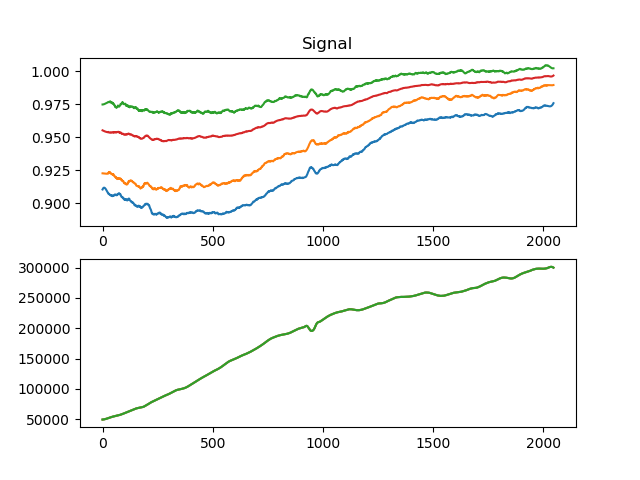

In [16]:
plt.figure()
plt.subplot(211)
plt.title('Signal')
plt.plot(signal[0,:])
plt.plot(signal[1,:])
plt.plot(signal[2,:])
plt.plot(np.mean(signal, axis=0))
plt.subplot(212)
plt.plot(background[0,:])
plt.plot(background[1,:])
plt.plot(np.mean(background, axis=0))

In [9]:
lambda_nm = np.linspace(446.1, 702, 2048)
c = 3
freq = c / lambda_nm
interp_freq = np.linspace(c/702, c/446.1,  2048)

In [10]:
test_sig = background[0,:]

In [29]:
test_sig[::-1].shape

(2048,)

In [30]:
prof_sig = np.apply_along_axis(_interpolate_row, 0, test_sig[::-1], freq[::-1], interp_freq)[::-1]

In [48]:
filter_window = 473
delta = 200

<IPython.core.display.Javascript object>


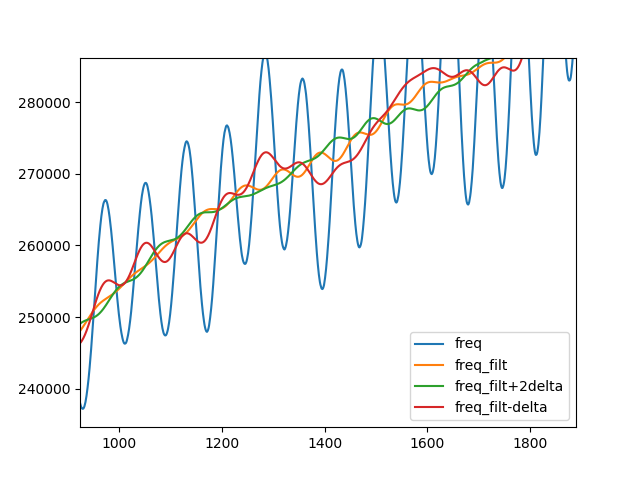

In [49]:
plt.figure()
# plt.plot(test_sig, label = 'raw')
plt.plot(prof_sig, label ='freq')
# plt.plot(savgol_filter(test_sig,filter_window,3), label = 'raw_filt')
plt.plot(savgol_filter(prof_sig,filter_window,3), label = 'freq_filt')
# plt.plot(savgol_filter(test_sig,filter_window+delta,3), label = 'raw_filt+delta')
plt.plot(savgol_filter(prof_sig,filter_window+delta,3), label = 'freq_filt+2delta')
# plt.plot(savgol_filter(test_sig,filter_window-delta,3), label = 'raw_filt-delta')
plt.plot(savgol_filter(prof_sig,filter_window-delta,3), label = 'freq_filt-delta')
plt.legend()

In [ ]:
len(data_out['SAROP11-ATT01:buffer'])

In [ ]:
plt.figure()
plt.subplot(221)
plt.title('x-corr')
plt.plot(data_out['SAROP11-ATT01:xcorr'][0])
plt.subplot(222)
plt.title('signal')
plt.plot(data_out['SAROP11-ATT01:signal'][0])

In [ ]:
prof_sig = data[parmas["prof_sig"]]

In [ ]:
prof_sig  = savgol_filter(prof_sig,filter_window,3)

In [ ]:
process()

<IPython.core.display.Javascript object>


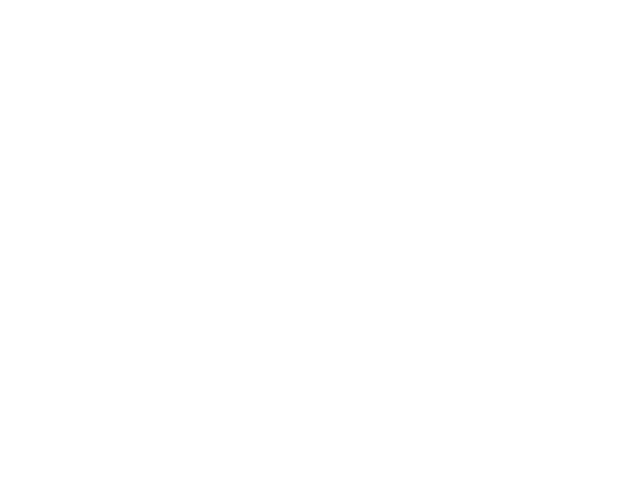

NameError: name 'prof_sig' is not defined

In [18]:
plt.figure()
plt.plot(prof_sig)